<a href="https://colab.research.google.com/github/GabriellaVirag/Hungarian_Policy_Agendas/blob/main/TK_oral_question.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# loading file
file_path = '/content/sample_data/oral_question_db.xlsx'
data = pd.read_excel(file_path)


In [ ]:
# Viewing the first few rows of data
data.head()

,id,year,majortopic,subtopic,description,source,id_root,electoral_cycle,paper_format,house_paper_nr,...,description_hu,gov_opp,party_affiliation,first_introducer,respondent,gov_affiliation,geographic,date_introduced,first_debate,floor_debate
0,K2018C00381,2018,3,9999,9999,https://www.parlament.hu:443/web/guest/iromany...,K2018C,2018-2022,K,K/381,...,9999,0,77,László Imre,emberi erőforrások minisztere,159,9999,2018-06-01,2018-06-04,1
1,K2018C00377,2018,5,9999,9999,https://www.parlament.hu:443/web/guest/iromany...,K2018C,2018-2022,K,K/377,...,9999,1,73,Dunai Mónika,emberi erőforrások minisztere,159,9999,2018-06-01,2018-06-04,1
2,K2018C00378,2018,10,9999,9999,https://www.parlament.hu:443/web/guest/iromany...,K2018C,2018-2022,K,K/378,...,9999,0,79,Burány Sándor,Miniszterelnökséget vezető miniszter,153,9999,2018-06-01,2018-06-04,1
3,K2018C00376,2018,10,9999,9999,https://www.parlament.hu:443/web/guest/iromany...,K2018C,2018-2022,K,K/376,...,9999,0,78,Schmuck Erzsébet,innovációért és technológiáért felelős miniszter,160,9999,2018-06-01,2018-06-04,1
4,K2018C00373,2018,12,9999,9999,https://www.parlament.hu:443/web/guest/iromany...,K2018C,2018-2022,K,K/373,...,9999,0,74,Staudt Gábor,igazságügyi miniszter,157,9999,2018-06-01,2018-06-04,1


In [ ]:
# Check for missing data in the relevant columns ('majortopic', 'gov_opp', 'first_introducer', 'party_affiliation')
missing_data = data[['majortopic', 'gov_opp', 'first_introducer', 'party_affiliation']].isnull().sum()

In [ ]:
# check what values ​​are in the majortopic and gov_opp columns
majortopic_values = data['majortopic'].value_counts()
gov_opp_values = data['gov_opp'].value_counts()

# Show results
majortopic_values, gov_opp_values


(majortopic
 3     97
 10    75
 20    58
 7     58
 6     52
 5     50
 14    48
 13    33
 12    31
 15    29
 1     19
 8     14
 4     12
 21    11
 19    10
 9      9
 18     6
 17     6
 2      6
 16     3
 23     1
 Name: count, dtype: int64,
 gov_opp
 0    547
 1     79
 5      2
 Name: count, dtype: int64)

In [ ]:
# Crosstab between majortopic and gov_opp variables
crosstab = pd.crosstab(data['majortopic'], data['gov_opp'])

# Show results
crosstab

gov_opp,0,1,5
majortopic,,,
1,17,2,0
2,5,1,0
3,97,0,0
4,8,4,0
5,43,7,0
6,48,4,0
7,58,0,0
8,14,0,0
9,8,1,0


In [ ]:
# Filter out the rows where the value of gov_opp is not 5
filtered_data = data[data['gov_opp'] != 5]

In [ ]:
# Create a crosstab based on filtered data
crosstab = pd.crosstab(filtered_data['majortopic'], filtered_data['gov_opp'])

# Show results
print(crosstab)

gov_opp      0   1
majortopic        
1           17   2
2            5   1
3           97   0
4            8   4
5           43   7
6           48   4
7           58   0
8           14   0
9            8   1
10          52  23
12          27   4
13          30   3
14          30  18
15          23   6
16           2   1
17           5   1
18           3   3
19           9   0
20          58   0
21           9   1
23           1   0


In [ ]:
# load the codebook file
codebook_path = '/content/sample_data/codebook.xlsx'
codebook = pd.read_excel(codebook_path)

# Viewing the first few lines from the codebook
codebook.head(), codebook.columns


(   majortopic    pah_codebook
 0           1  Macroeconomics
 1           2    Civil Rights
 2           3          Health
 3           4     Agriculture
 4           5           Labor,
 Index(['majortopic', 'pah_codebook'], dtype='object'))

In [ ]:
codebook

,majortopic,pah_codebook
0,1,Macroeconomics
1,2,Civil Rights
2,3,Health
3,4,Agriculture
4,5,Labor
5,6,Education
6,7,Environment
7,8,Energy
8,9,Immigration
9,10,Transportation


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['majortopic'].plot(kind='hist', bins=20, title='majortopic')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='index', y='majortopic', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['majortopic']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'majortopic'}, axis=1)
              .sort_values('majortopic', ascending=True))
  xs = counted['majortopic']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('majortopic', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('majortopic')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_5['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_6['majortopic'].plot(kind='line', figsize=(8, 4), title='majortopic')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
# Join two tables based on the 'majortopic' column
merged_data = pd.merge(data, codebook, how='left', left_on='majortopic', right_on='majortopic')

# Show results
print(merged_data.head())


            id  year  majortopic  subtopic  description  \
0  K2018C00381  2018           3      9999         9999   
1  K2018C00377  2018           5      9999         9999   
2  K2018C00378  2018          10      9999         9999   
3  K2018C00376  2018          10      9999         9999   
4  K2018C00373  2018          12      9999         9999   

                                              source id_root electoral_cycle  \
0  https://www.parlament.hu:443/web/guest/iromany...  K2018C       2018-2022   
1  https://www.parlament.hu:443/web/guest/iromany...  K2018C       2018-2022   
2  https://www.parlament.hu:443/web/guest/iromany...  K2018C       2018-2022   
3  https://www.parlament.hu:443/web/guest/iromany...  K2018C       2018-2022   
4  https://www.parlament.hu:443/web/guest/iromany...  K2018C       2018-2022   

  paper_format house_paper_nr  ... gov_opp  party_affiliation  \
0            K          K/381  ...       0                 77   
1            K          K/377  ...

In [ ]:
# Checks for NaN in the data
print(merged_data.isnull().values.any())

False


In [ ]:
# Filter out the rows where the value of gov_opp is not 5
filtered_data = merged_data[merged_data['gov_opp'] != 5]

# Create a crosstab
crosstab_result = pd.crosstab(filtered_data['gov_opp'], filtered_data['pah_codebook'], margins=True)

# Show results
print(crosstab_result)

pah_codebook  Agriculture  Civil Rights  Culture  Defense  Domestic Commerce  \
gov_opp                                                                        
0                       8             5        1        2                 23   
1                       4             1        0        1                  6   
All                    12             6        1        3                 29   

pah_codebook  Education  Energy  Environment  Foreign Trade  \
gov_opp                                                       
0                    48      14           58              3   
1                     4       0            0              3   
All                  52      14           58              6   

pah_codebook  Government Operations  ...  Immigration  International Affairs  \
gov_opp                              ...                                       
0                                58  ...            8                      9   
1                                 0  ...   

**Stacked Bar Chart**

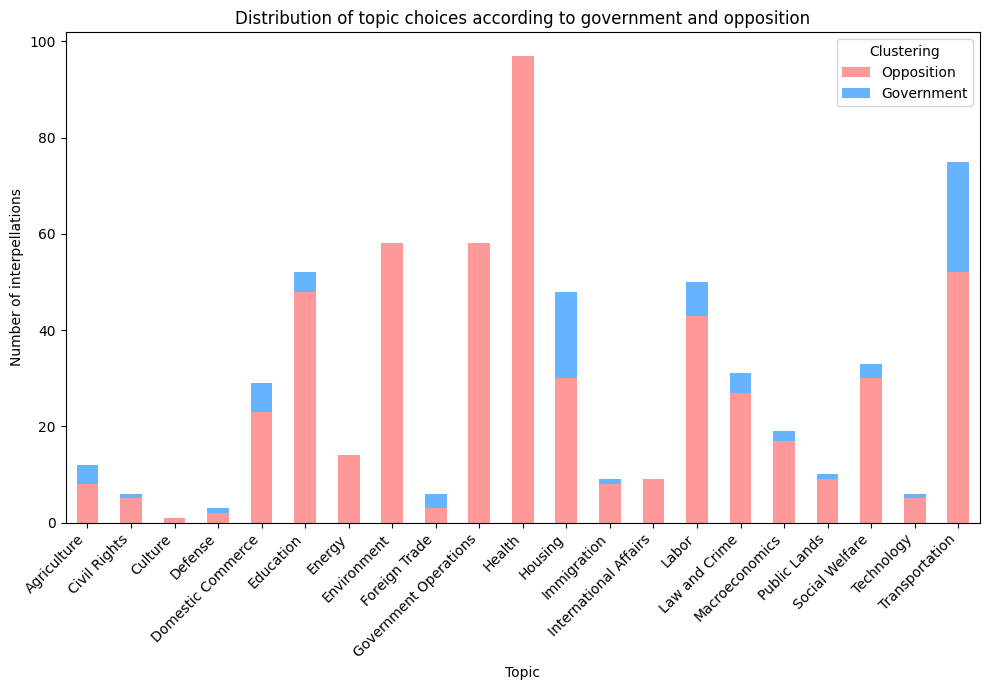

In [ ]:
import matplotlib.pyplot as plt

# Names of cross table columns according to the government and the opposition
crosstab_result.columns = ['Opposition', 'Government']

# Create a stacked bar chart
crosstab_result.plot(kind='bar', stacked=True, figsize=(10, 7), color=['#ff9999','#66b3ff'])

# Chart title and axis names
plt.title('Distribution of topic choices according to government and opposition')
plt.xlabel('Topic')
plt.ylabel('Number of interpellations')
plt.legend(title='Clustering', loc='upper right')
plt.xticks(rotation=45, ha='right')

# Show chart
plt.tight_layout()
plt.show()

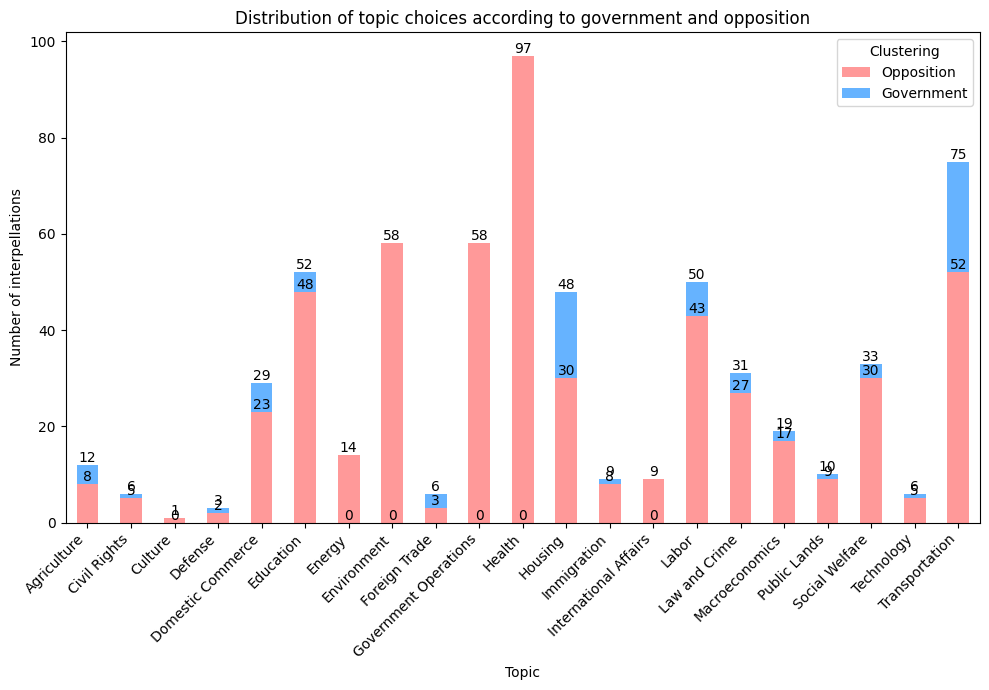

In [ ]:
import matplotlib.pyplot as plt

# Names of cross table columns according to the government and the opposition
crosstab_result.columns = ['Opposition', 'Government']

# Create a stacked bar chart
ax = crosstab_result.plot(kind='bar', stacked=True, figsize=(10, 7), color=['#ff9999','#66b3ff'])

# Chart title and axis names
plt.title('Distribution of topic choices according to government and opposition')
plt.xlabel('Topic')
plt.ylabel('Number of interpellations')
plt.legend(title='Clustering', loc='upper right')
plt.xticks(rotation=45, ha='right')

# Add values on top of the bars
for container in ax.containers:
    ax.bar_label(container)

# Show chart
plt.tight_layout()
plt.show()


**Pie Chart**

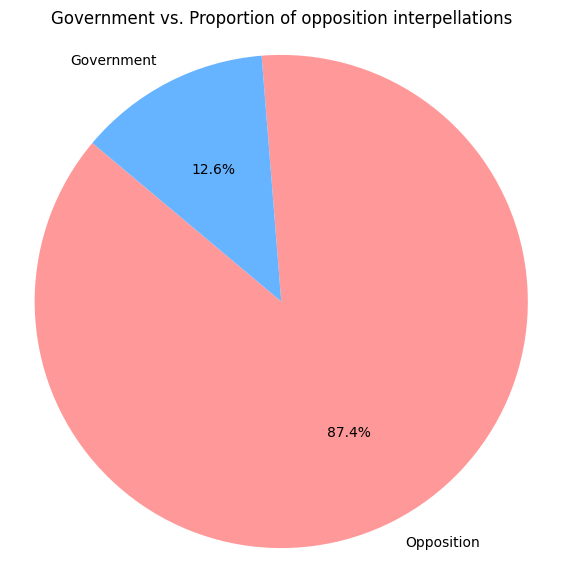

In [ ]:
filtered_data = merged_data[merged_data['gov_opp'] != 5]
crosstab_result = pd.crosstab(filtered_data['pah_codebook'], filtered_data['gov_opp'], margins=False)
crosstab_result.columns = ['Opposition', 'Government']

# Summary of government and opposition interpellations
gov_interpellations = crosstab_result['Government'].sum()
opp_interpellations = crosstab_result['Opposition'].sum()

# Data for a pie chart
labels = ['Opposition', 'Government']
sizes = [opp_interpellations, gov_interpellations]
colors = ['#ff9999', '#66b3ff']

# Create Pie Chart
plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Government vs. Proportion of opposition interpellations')

plt.axis('equal')  # Maintain circle proportions
plt.show()

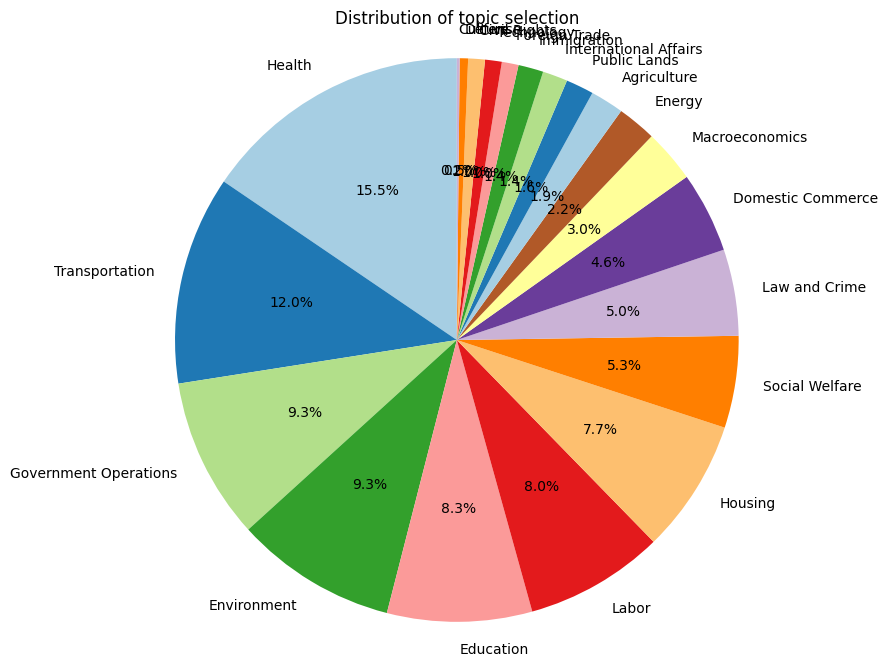

In [ ]:
# Summary of each category
total_counts = filtered_data['pah_codebook'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(total_counts, labels=total_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)

# Title
plt.title('Distribution of topic selection')
plt.axis('equal')  # Maintain circle proportions
plt.show()

**Grouped Bar Chart**

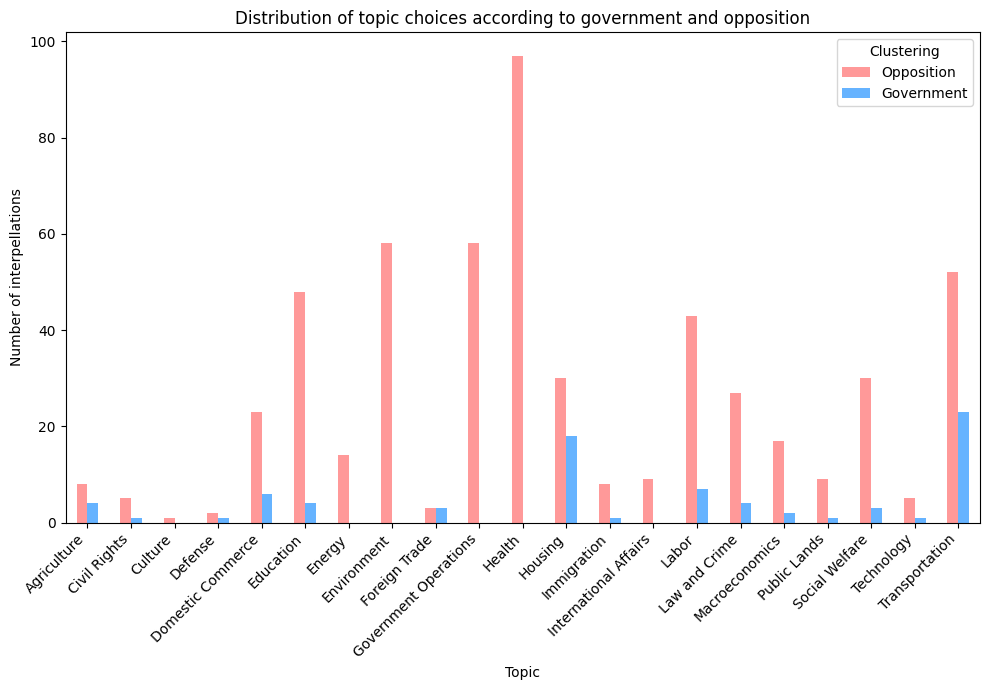

In [ ]:
# Create Group Bar Chart
crosstab_result.plot(kind='bar', stacked=False, figsize=(10, 7), color=['#ff9999','#66b3ff'])

# Chart title and axis names
plt.title('Distribution of topic choices according to government and opposition')
plt.xlabel('Topic')
plt.ylabel('Number of interpellations')
plt.legend(title='Clustering', loc='upper right')
plt.xticks(rotation=45, ha='right')

# Show chart
plt.tight_layout()
plt.show()

In [ ]:
# swapping rows and columns
transposed_crosstab_result = crosstab_result.T

# Show results
print(transposed_crosstab_result)

gov_opp                  0   1  All
pah_codebook                       
Agriculture              8   4   12
Civil Rights             5   1    6
Culture                  1   0    1
Defense                  2   1    3
Domestic Commerce       23   6   29
Education               48   4   52
Energy                  14   0   14
Environment             58   0   58
Foreign Trade            3   3    6
Government Operations   58   0   58
Health                  97   0   97
Housing                 30  18   48
Immigration              8   1    9
International Affairs    9   0    9
Labor                   43   7   50
Law and Crime           27   4   31
Macroeconomics          17   2   19
Public Lands             9   1   10
Social Welfare          30   3   33
Technology               5   1    6
Transportation          52  23   75
All                    547  79  626


In [ ]:
import scipy.stats as stats

# Application of Chi2 test
chi2, p, dof, expected = stats.chi2_contingency(crosstab_result)

# Show results
print("Chi-square value:", chi2)
print("p-value:", p)
print("Degree of freedom (dof):", dof)
print("Expected frequencies:\n", expected)

Chi-square value: 100.41748928331248
p-value: 1.0868571705652693e-06
Degree of freedom (dof): 42
Expected frequencies:
 [[1.04856230e+01 5.24281150e+00 8.73801917e-01 2.62140575e+00
  2.53402556e+01 4.54376997e+01 1.22332268e+01 5.06805112e+01
  5.24281150e+00 5.06805112e+01 8.47587859e+01 4.19424920e+01
  7.86421725e+00 7.86421725e+00 4.36900958e+01 2.70878594e+01
  1.66022364e+01 8.73801917e+00 2.88354633e+01 5.24281150e+00
  6.55351438e+01 5.47000000e+02]
 [1.51437700e+00 7.57188498e-01 1.26198083e-01 3.78594249e-01
  3.65974441e+00 6.56230032e+00 1.76677316e+00 7.31948882e+00
  7.57188498e-01 7.31948882e+00 1.22412141e+01 6.05750799e+00
  1.13578275e+00 1.13578275e+00 6.30990415e+00 3.91214058e+00
  2.39776358e+00 1.26198083e+00 4.16453674e+00 7.57188498e-01
  9.46485623e+00 7.90000000e+01]
 [1.20000000e+01 6.00000000e+00 1.00000000e+00 3.00000000e+00
  2.90000000e+01 5.20000000e+01 1.40000000e+01 5.80000000e+01
  6.00000000e+00 5.80000000e+01 9.70000000e+01 4.80000000e+01
  9.0000

In [ ]:
# select relevant topics based on majortopic (pah_codebook)
# Results of economic and government policies: Macroeconomics (1), Foreign Trade (18), Government Operations (20)
# Government failures and justice: Law and Crime (12)

# Filter the relevant lines based on the majortopic codes
relevant_topics = [1, 12, 18, 20]

# Filter the relevant data
new_filtered_data = merged_data[merged_data['majortopic'].isin(relevant_topics) & (merged_data['gov_opp'] != 5)]

# create a crosstab based on gov_opp and the relevant majortopic
crosstab_topics = pd.crosstab(new_filtered_data['gov_opp'], new_filtered_data['majortopic'])

# Show results
crosstab_topics


majortopic,1,12,18,20
gov_opp,,,,
0,17,27,3,58
1,2,4,3,0


**Line chart**

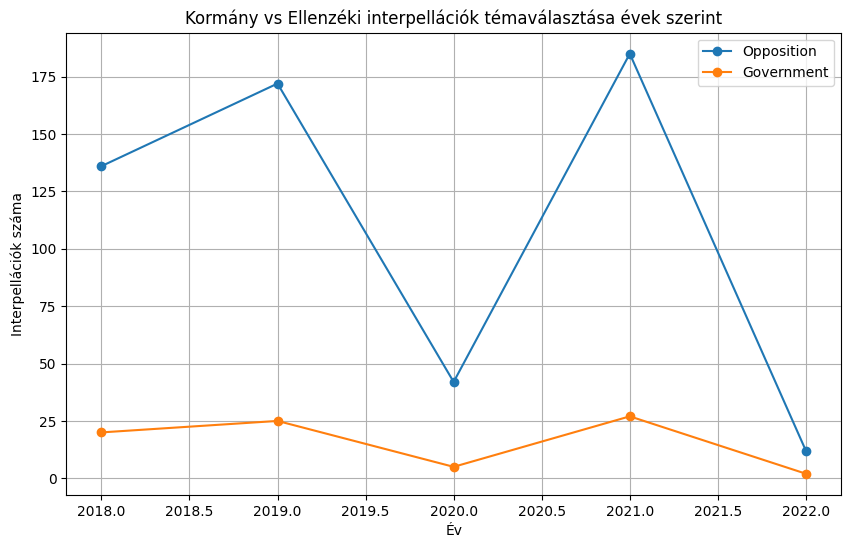

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Szűrt adatok, ahol gov_opp nem egyenlő 5
filtered_data = merged_data[merged_data['gov_opp'] != 5]

# Csoportosítás év és politikai pártállás (kormány vs ellenzék) szerint
grouped_data = filtered_data.groupby(['year', 'gov_opp']).size().unstack(fill_value=0)

# Vonaldiagram készítése
plt.figure(figsize=(10,6))
plt.plot(grouped_data.index, grouped_data[0], label='Opposition', marker='o')
plt.plot(grouped_data.index, grouped_data[1], label='Government', marker='o')

# Diagram címek és tengelyek megnevezése
plt.title('Kormány vs Ellenzéki interpellációk témaválasztása évek szerint')
plt.xlabel('Év')
plt.ylabel('Interpellációk száma')

# Jelmagyarázat megjelenítése
plt.legend()

# Diagram megjelenítése
plt.grid(True)
plt.show()

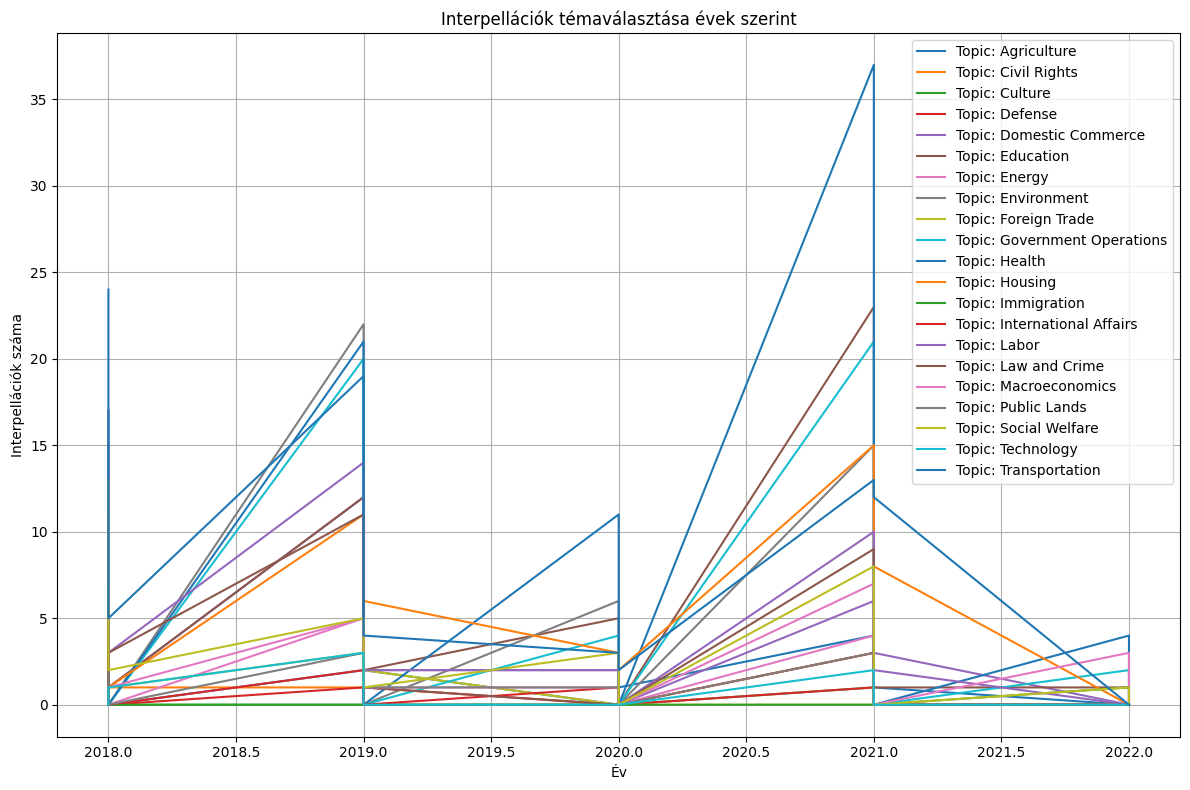

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Szűrt adatok, ahol gov_opp nem egyenlő 5
filtered_data = merged_data[merged_data['gov_opp'] != 5]

# Csoportosítás év, politikai pártállás (gov_opp) és témák (pah_codebook) szerint
grouped_data = filtered_data.groupby(['year', 'gov_opp', 'pah_codebook']).size().unstack(fill_value=0)

# Reset index a csoportosított adatokon, hogy könnyebben hozzáférhessünk
grouped_data = grouped_data.reset_index()

# A témakörök listája
topics = grouped_data.columns[2:]  # Az első két oszlop az év és a kormányzati állás, a többi téma

# Vonaldiagram rajzolása
plt.figure(figsize=(12,8))

# Ciklus a témák ábrázolásához
for topic in topics:
    # Külön vonalak rajzolása a kormányzati és ellenzéki interpellációkhoz
    plt.plot(grouped_data['year'], grouped_data[topic], label=f'Topic: {topic}', linestyle='solid')

# Diagram címek és tengelyek megnevezése
plt.title('Interpellációk témaválasztása évek szerint')
plt.xlabel('Év')
plt.ylabel('Interpellációk száma')

# Jelmagyarázat megjelenítése
plt.legend(loc='upper right')

# Diagram megjelenítése
plt.grid(True)
plt.tight_layout()
plt.show()


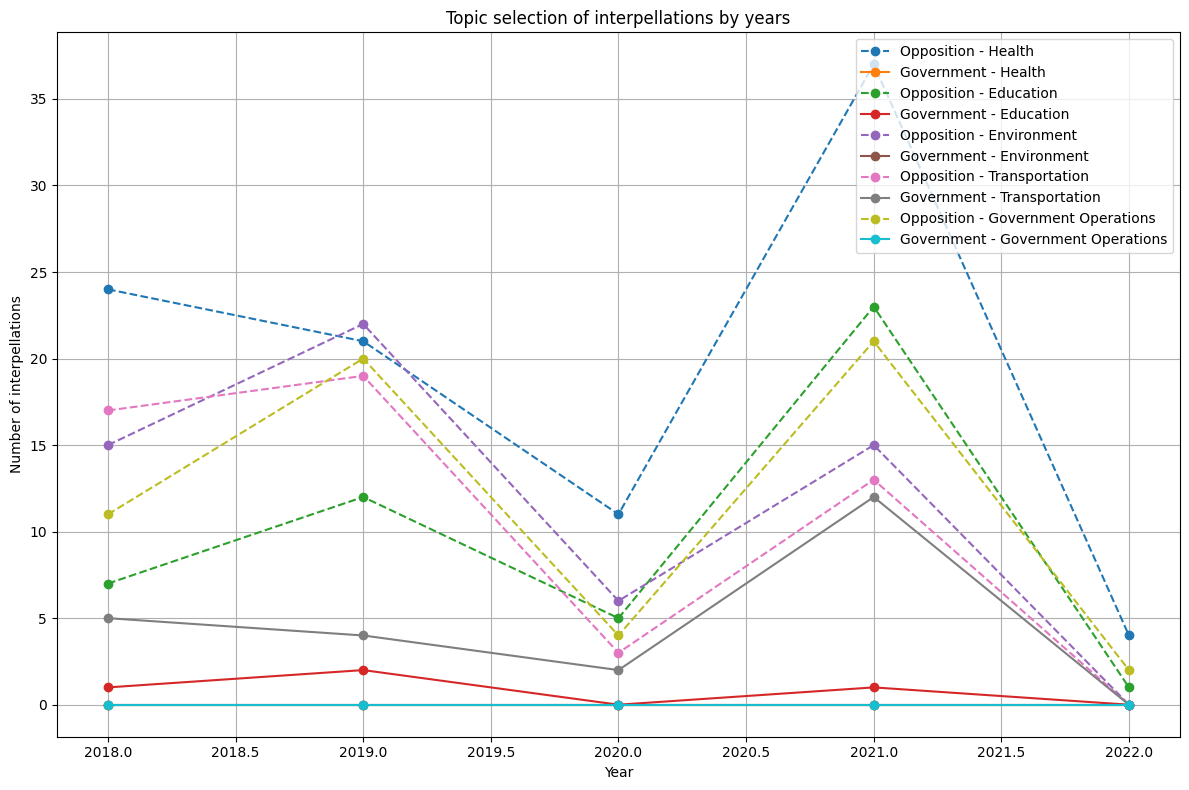

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

filtered_data = merged_data[merged_data['gov_opp'] != 5]

# Grouping by year, political party (gov_opp) and topics (pah_codebook).
grouped_data = filtered_data.groupby(['year', 'gov_opp', 'pah_codebook']).size().unstack(fill_value=0)

# Reset index on grouped data for easier access
grouped_data = grouped_data.reset_index()

# List of selected topics
topics_to_include = ['Health', 'Education', 'Environment', 'Transportation', 'Government Operations']

# Filtering only to selected topics
filtered_topics = [topic for topic in topics_to_include if topic in grouped_data.columns]

# Draw a line chart
plt.figure(figsize=(12, 8))

# Cycle to represent selected topics
for topic in filtered_topics:
    # Drawing separate lines for government and opposition interpellations
    for gov_status in [0, 1]:  # 0 for the opposition, 1 for the government
        y_data = grouped_data.loc[grouped_data['gov_opp'] == gov_status, topic]
        x_values = grouped_data.loc[grouped_data['gov_opp'] == gov_status, 'year']

        # We only draw it if there is data
        if not y_data.empty:
            plt.plot(x_values, y_data,
                     label=f'{"Opposition" if gov_status == 0 else "Government"} - {topic}',
                     linestyle='dashed' if gov_status == 0 else 'solid',
                     marker='o')

# Designation of diagram titles and axes
plt.title('Topic selection of interpellations by years')
plt.xlabel('Year')
plt.ylabel('Number of interpellations')

# Show legend
plt.legend(loc='upper right')

# Show chart
plt.grid(True)
plt.tight_layout()
plt.show()
